In [108]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import xarray as xr
import math

In [109]:
# Create a set of hidden variables, z, which control the entire system. (If we could observe all of Z, we'd have R^2 = 1)
Nz = 50 # Number of hidden variables 
M = 1000 # Number of samples / data-points

Z = np.random.randn(M, Nz)

In [110]:
# Create the target of the prediction, y, which is a function of the Z variables, like Y = 0.1*z[0] + 0.2*z[1]...
cz = np.random.rand(Nz) # Random coefficient vector
y = Z.dot(cz)

In [111]:
# Create the observed variables (A subset of the hidden variables)
#FOR PCA purposes
Nx = 20
A = np.random.randn(Nz,Nx)
X = Z @ A

<IPython.core.display.Javascript object>


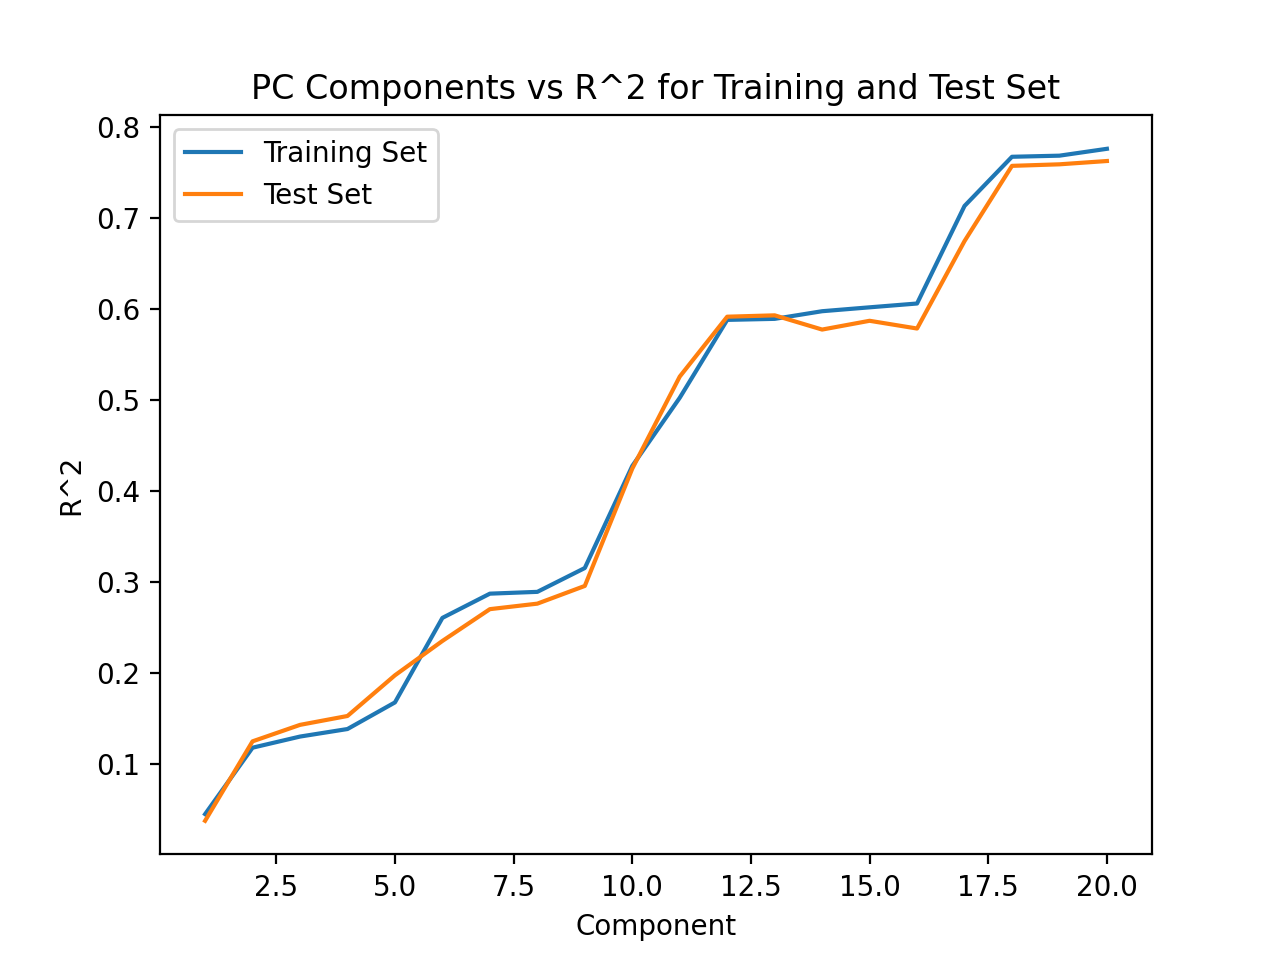

In [118]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
sc.fit(X_test)
    
X_reduced_train = sc.transform(X_train)
X_reduced_test = sc.transform(X_test)

def pcs(n):
    
    pca = PCA(n_components= n)
    pca.fit(X_train)

    X_train_pca = pca.transform(X_reduced_train)
    X_test_pca = pca.transform(X_reduced_test)

    model = linear_model.LinearRegression(fit_intercept=True)
    model.fit(X_train_pca, y_train)

    y_pred_test_pca = model.predict(X_test_pca)
    y_pred_train_pca = model.predict(X_train_pca)

    from sklearn.metrics import r2_score
    r2_train = r2_score(y_train, y_pred_train_pca)
    r2_test = r2_score(y_test, y_pred_test_pca)

    return r2_train,r2_test

train_r2s = []
test_r2s = []
component_num = []

for i in range(1,21):
    r2 = pcs(i)
    train_r2s.append(r2[0])
    test_r2s.append(r2[1])
    component_num.append(i)
    
plt.figure()
plt.title('PC Components vs R^2 for Training and Test Set')
plt.plot(component_num,train_r2s,label = 'Training Set')
plt.plot(component_num,test_r2s, label = 'Test Set')
plt.xlabel('Component')
plt.ylabel('R^2')
plt.legend()
plt.show()  

In [132]:
def r2pcs(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    sc = StandardScaler()
    sc.fit(X_train)
    sc.fit(X_test)

    X_reduced_train = sc.transform(X_train)
    X_reduced_test = sc.transform(X_test)

    def pcs(n):

        pca = PCA(n_components= n)
        pca.fit(X_train)

        X_train_pca = pca.transform(X_reduced_train)
        X_test_pca = pca.transform(X_reduced_test)

        model = linear_model.LinearRegression(fit_intercept=True)
        model.fit(X_train_pca, y_train)

        y_pred_test_pca = model.predict(X_test_pca)
        y_pred_train_pca = model.predict(X_train_pca)

        from sklearn.metrics import r2_score
        r2_train = r2_score(y_train, y_pred_train_pca)
        r2_test = r2_score(y_test, y_pred_test_pca)

        return r2_train,r2_test

    train_r2s = []
    test_r2s = []
    component_num = []

    for i in range(1,21):
        r2 = pcs(i)
        train_r2s.append(r2[0])
        test_r2s.append(r2[1])
        component_num.append(i)

    plt.figure()
    plt.title('PC Components vs R^2 for Training and Test Set')
    plt.plot(component_num,train_r2s,label = 'Training Set')
    plt.plot(component_num,test_r2s, label = 'Test Set')
    plt.xlabel('Component')
    plt.ylabel('R^2')
    plt.legend()
    plt.show()  

<IPython.core.display.Javascript object>


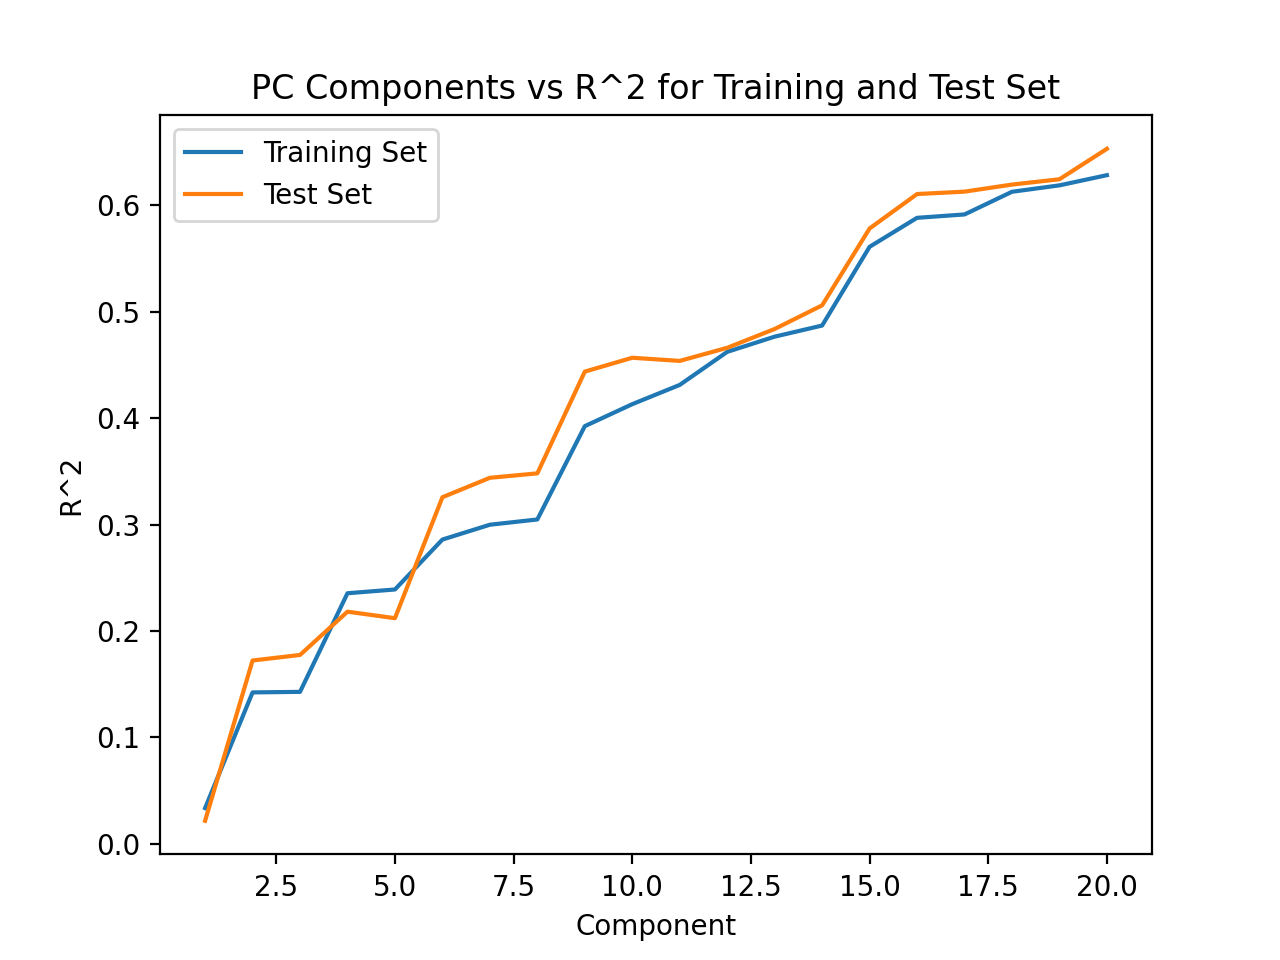

In [137]:
def X_y(Nz_i, M_i, Nx_i):
    Nz = Nz_i # Number of hidden variables 
    M = M_i # Number of samples / data-points
    Z = np.random.randn(M, Nz)
    
    cz = np.random.rand(Nz) # Random coefficient vector
    y = Z.dot(cz)
    
    Nx = Nx_i
    A = np.random.randn(Nz,Nx)
    X = Z @ A
    
    return X,y


<IPython.core.display.Javascript object>


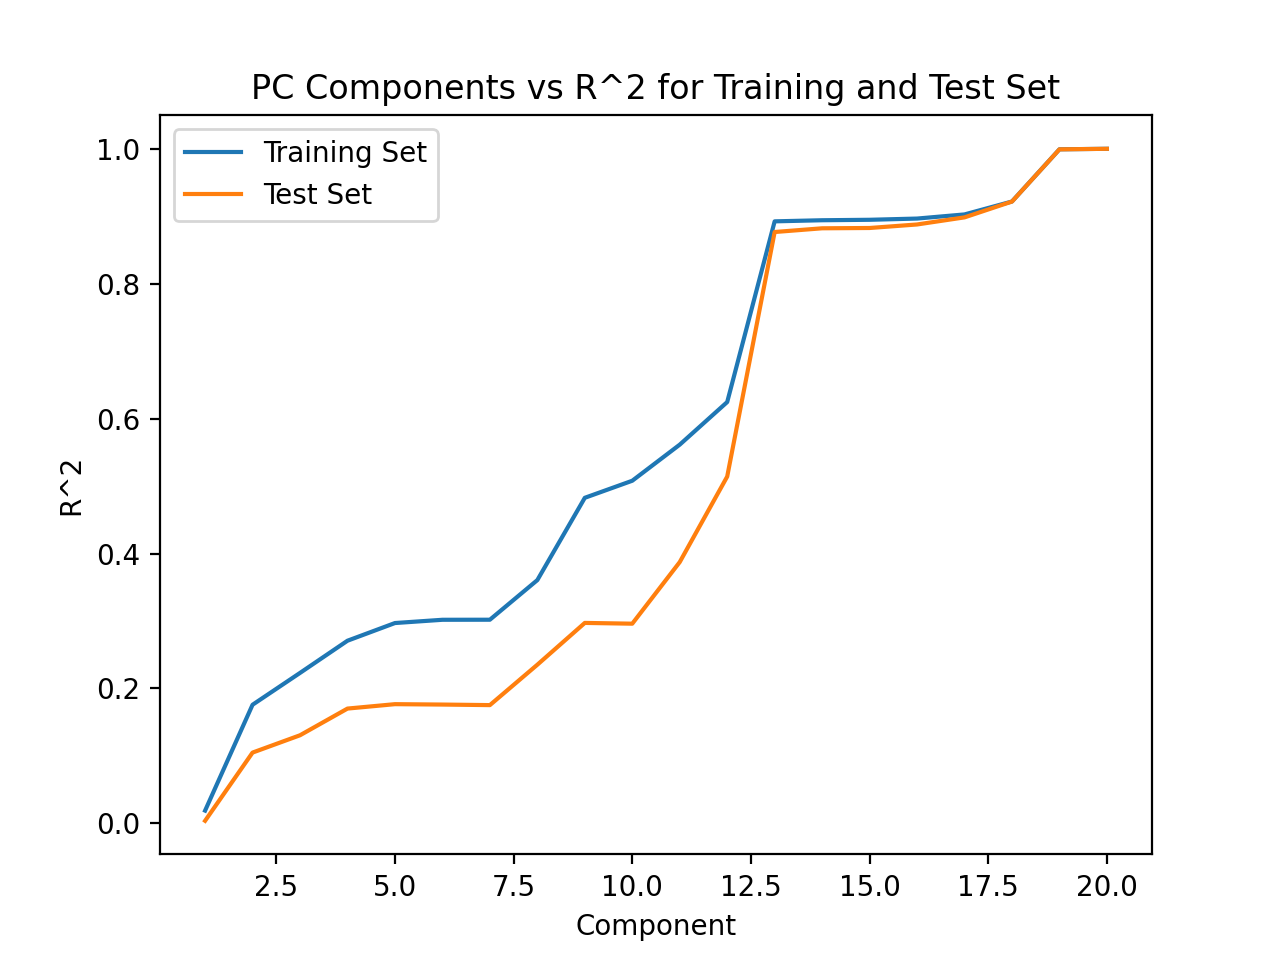

In [143]:
# Nz = 20, M = 1000,Nx = 20

input_1 = X_y(20, 1000, 20)
r2pcs(input_1[0],input_1[1])

<IPython.core.display.Javascript object>


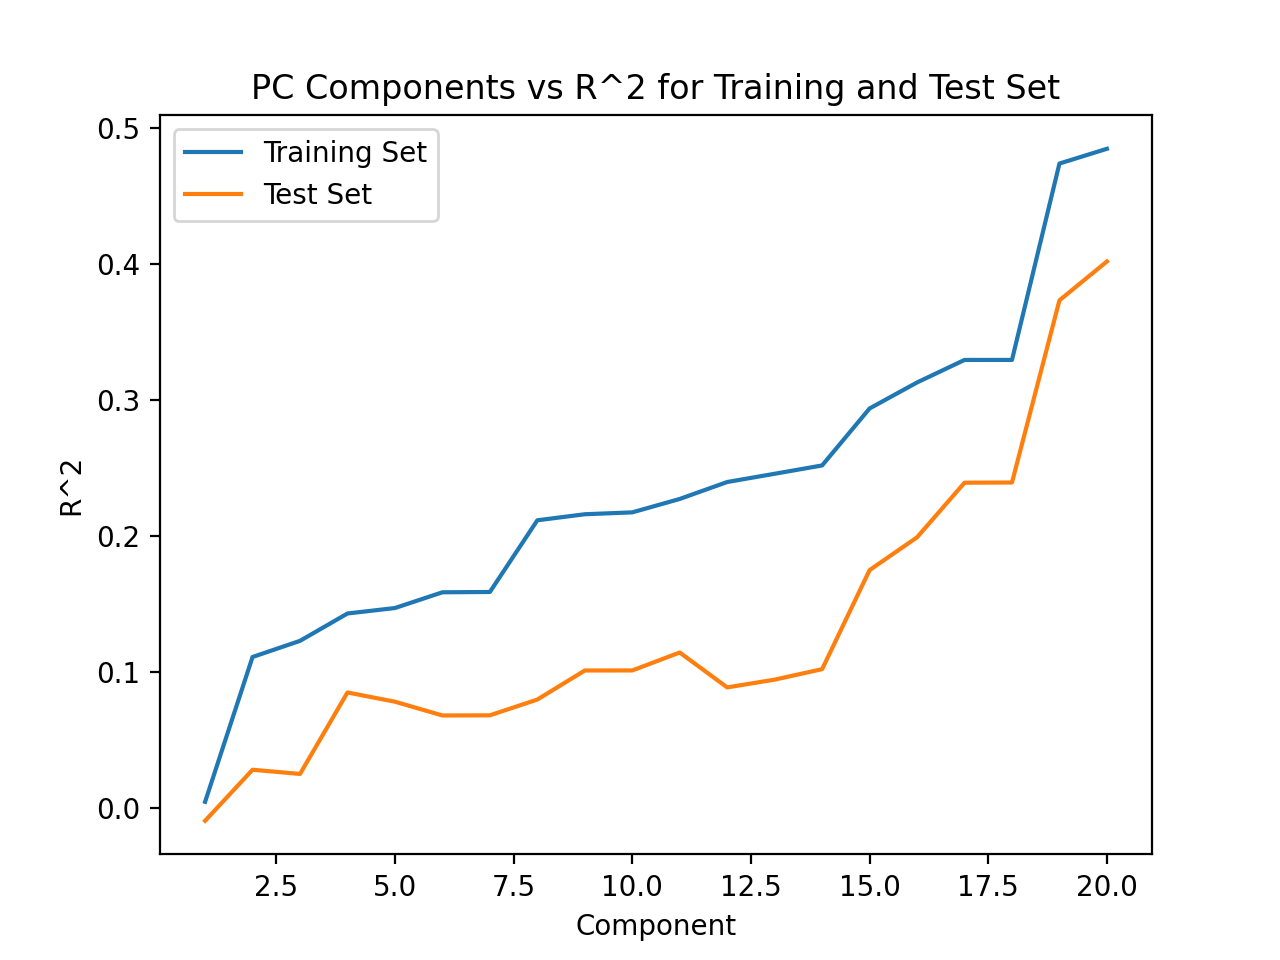

In [144]:
# Nz = 50, M = 1000,Nx = 20

input_2 = X_y(50, 1000, 20)
r2pcs(input_2[0],input_2[1])


<IPython.core.display.Javascript object>


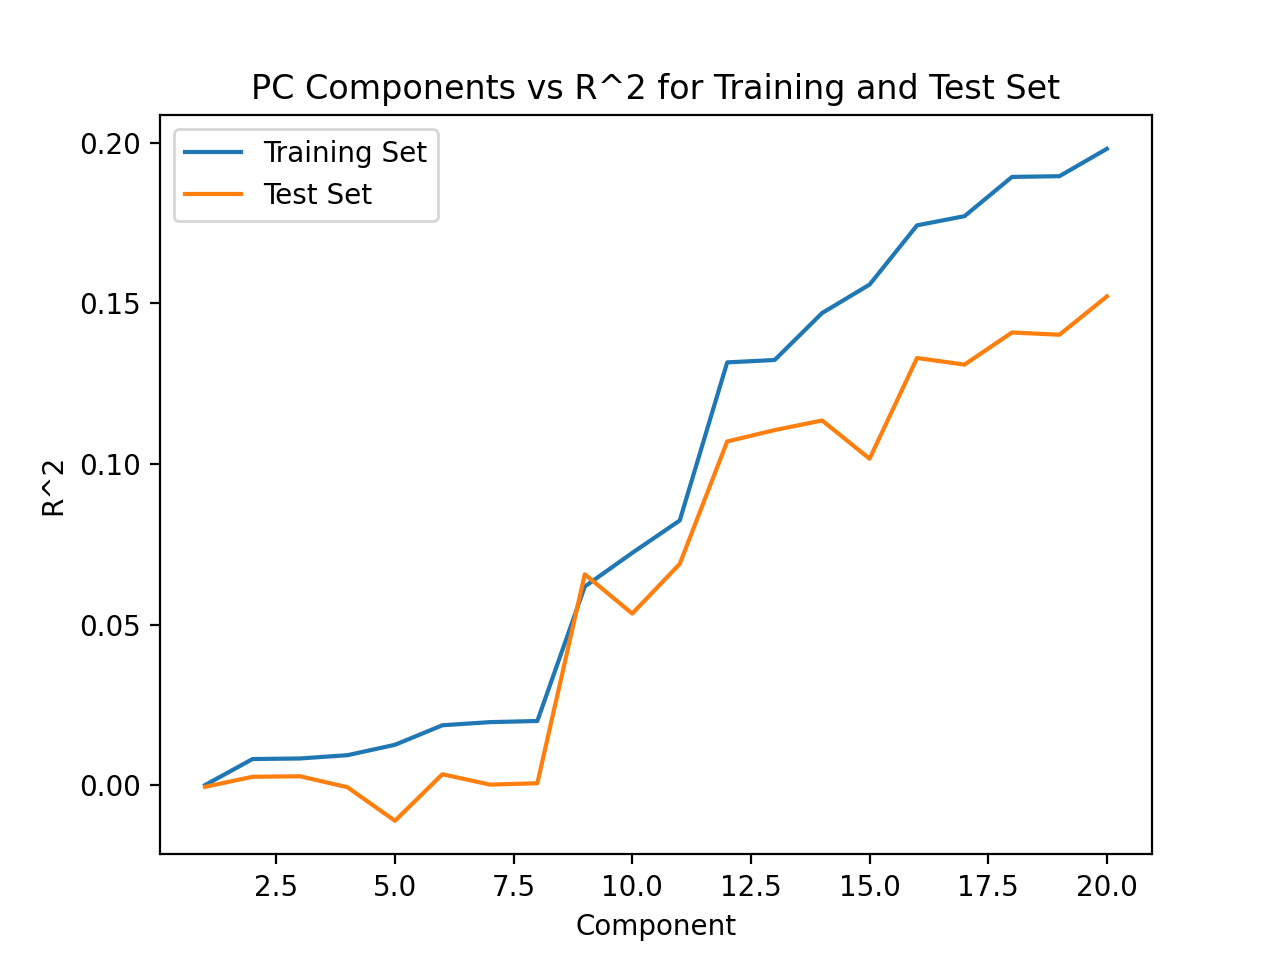

In [145]:
# Nz = 100, M = 1000,Nx = 20

input_3 = X_y(100, 1000, 20)
r2pcs(input_3[0],input_3[1])

<IPython.core.display.Javascript object>


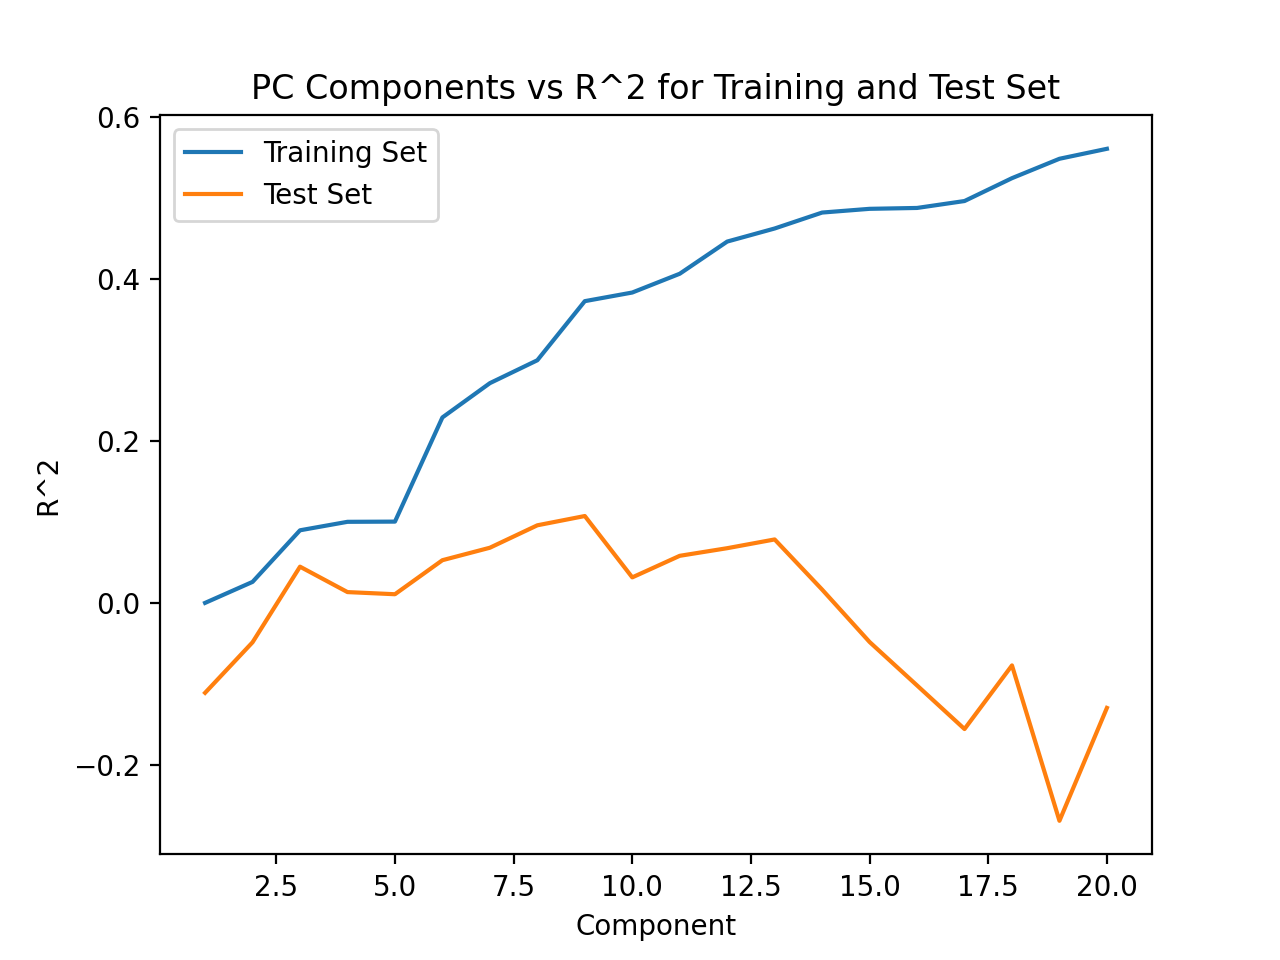

In [148]:
# Nz = 50, M = 100,Nx = 20

input_4 = X_y(50, 100, 20)
r2pcs(input_4[0],input_4[1])

In [123]:
def r2(Nz, M, Nx):
    Nz = Nz # Number of hidden variables 
    M = M # Number of samples / data-points
    
    Z = np.random.randn(M, Nz)
    
    cz = np.random.rand(Nz) 
    y = Z.dot(cz)
    
    Nx = Nx #total number of PCA components
    A = np.random.randn(Nz,Nx)
    X = Z @ A
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

    sc = StandardScaler()
    sc.fit(X_train)
    sc.fit(X_test)
    
    X_reduced_train = sc.transform(X_train)
    X_reduced_test = sc.transform(X_test)

    pca = PCA(n_components= Nx)
    pca.fit(X_reduced_train)
    
    X_train_pca = pca.transform(X_reduced_train)
    X_test_pca = pca.transform(X_reduced_test)
    
    model = linear_model.LinearRegression(fit_intercept=True)
    model.fit(X_train_pca, y_train)
    
    y_pred_test_pca = model.predict(X_test_pca)
    y_pred_train_pca = model.predict(X_train_pca)
    
   
    from sklearn.metrics import r2_score
    r2_train = r2_score(y_train, y_pred_train_pca)
    r2_test = r2_score(y_test, y_pred_test_pca)
    
    return r2_train,r2_test

def component_r2(Nz,M, Nx):

    component = []
    train_r2s = []
    test_r2s = []
    
    for i in range(1,Nx + 1):
        r2_val = r2(Nz,M,Nx)
        train = r2_val[0]
        test = r2_val[1]
        
        component.append(i)
        train_r2s.append(train)
        test_r2s.append(test)
        
    return train_r2s,test_r2s,component
        

In [125]:
r2(50,1000,20)

(0.40703557748271135, 0.3236028988520414)

<IPython.core.display.Javascript object>


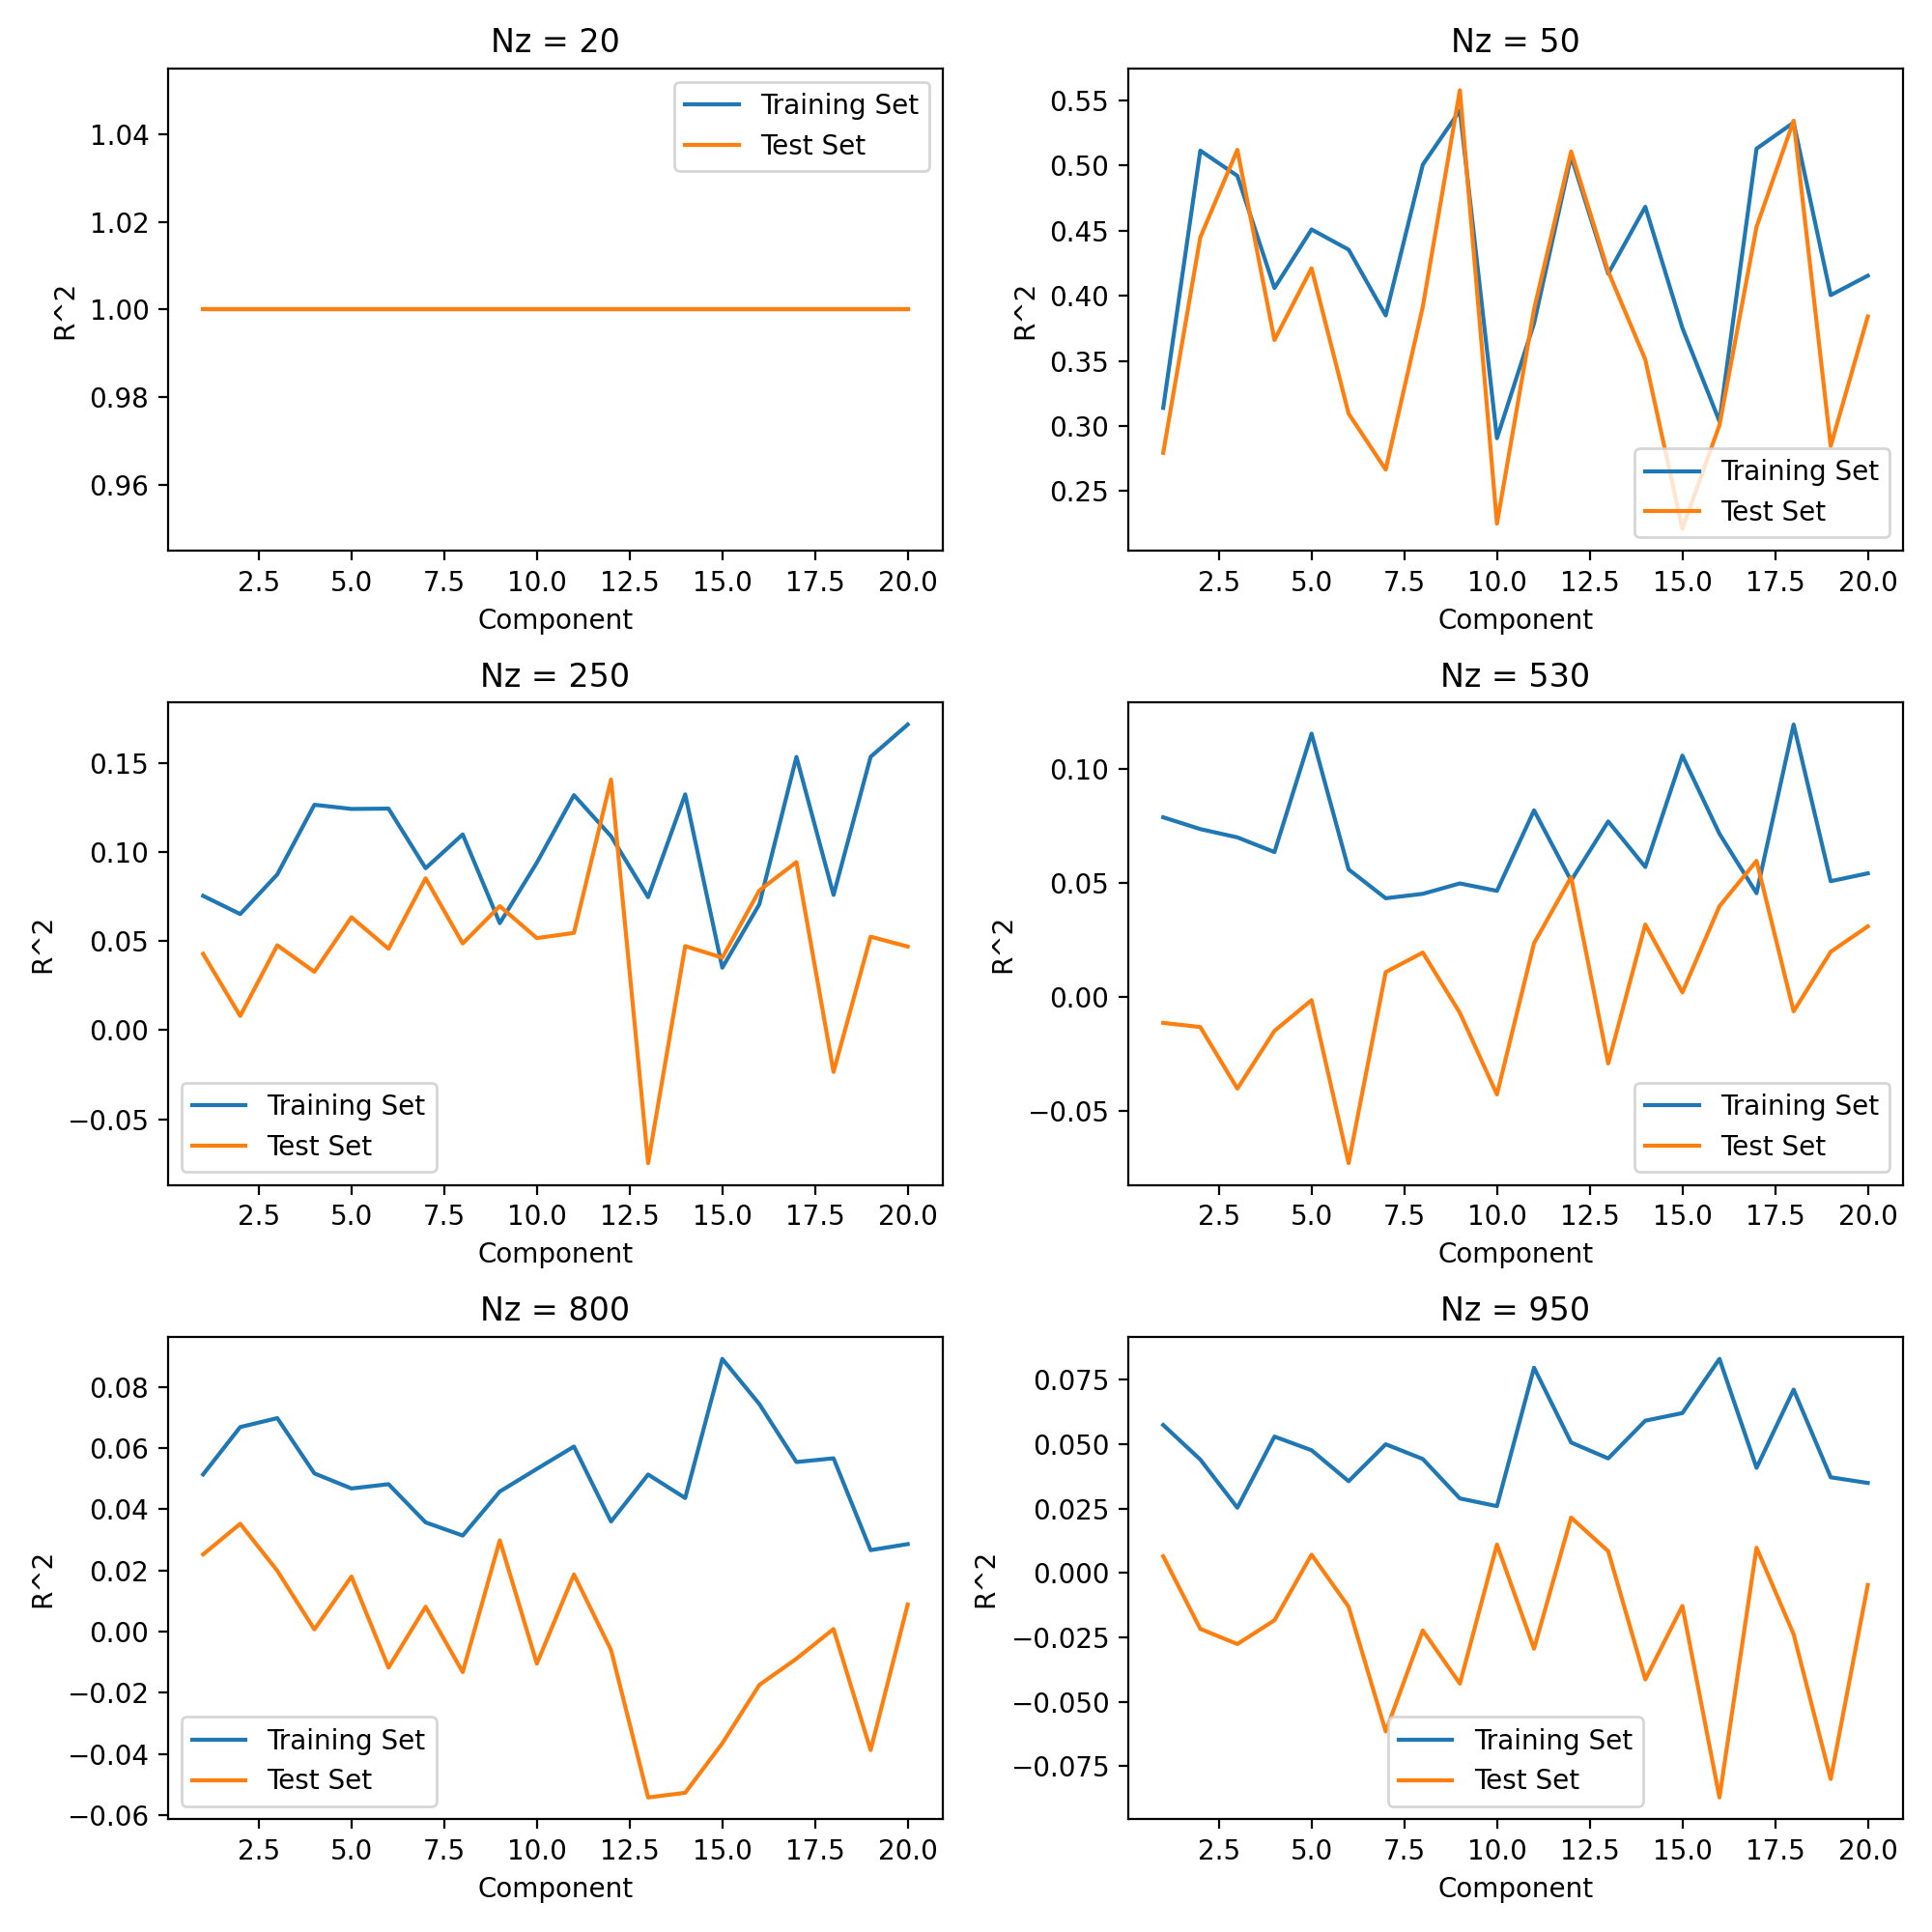

In [128]:
#SUBPLOTS OF CHANGING Nz

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(10, 10))


# Nz = 20, M = 1000,Nx = 20
ax_1components = component_r2(20,1000,20)
ax1.plot(ax_1components[2],ax_1components[0],label = 'Training Set')
ax1.plot(ax_1components[2],ax_1components[1], label = 'Test Set')
ax1.set_xlabel('Component')
ax1.set_ylabel('R^2')
ax1.set_title('Nz = 20')
ax1.legend()


# Nz = 50, M = 1000, Nx = 20
ax2_components = component_r2(50,1000,20)
ax2.plot(ax2_components[2],ax2_components[0],label = 'Training Set')
ax2.plot(ax2_components[2],ax2_components[1], label = 'Test Set')
ax2.set_xlabel('Component')
ax2.set_ylabel('R^2')
ax2.set_title('Nz = 50')
ax2.legend()

# Nz = 250, M = 1000, Nx = 20
ax3_components = component_r2(250,1000,20)
ax3.plot(ax3_components[2],ax3_components[0],label = 'Training Set')
ax3.plot(ax3_components[2],ax3_components[1], label = 'Test Set')
ax3.set_xlabel('Component')
ax3.set_ylabel('R^2')
ax3.set_title('Nz = 250')
ax3.legend()

# Nz = 530, M = 1000, Nx = 20
ax4_components = component_r2(530,1000,20)
ax4.plot(ax4_components[2],ax4_components[0],label = 'Training Set')
ax4.plot(ax4_components[2],ax4_components[1], label = 'Test Set')
ax4.set_xlabel('Component')
ax4.set_ylabel('R^2')
ax4.set_title('Nz = 530')
ax4.legend()

# Nz = 800, M = 1000, Nx = 20
ax5_components = component_r2(800,1000,20)
ax5.plot(ax5_components[2],ax5_components[0],label = 'Training Set')
ax5.plot(ax5_components[2],ax5_components[1], label = 'Test Set')
ax5.set_xlabel('Component')
ax5.set_ylabel('R^2')
ax5.set_title('Nz = 800')
ax5.legend()

# Nz = 950, M = 1000, Nx = 20
ax6_components = component_r2(950,1000,20)
ax6.plot(ax6_components[2],ax6_components[0],label = 'Training Set')
ax6.plot(ax6_components[2],ax6_components[1], label = 'Test Set')
ax6.set_xlabel('Component')
ax6.set_ylabel('R^2')
ax6.set_title('Nz = 950')
ax6.legend()

fig.tight_layout()
plt.show()
plt.savefig('pca_r2_vals_nz.png')

<IPython.core.display.Javascript object>


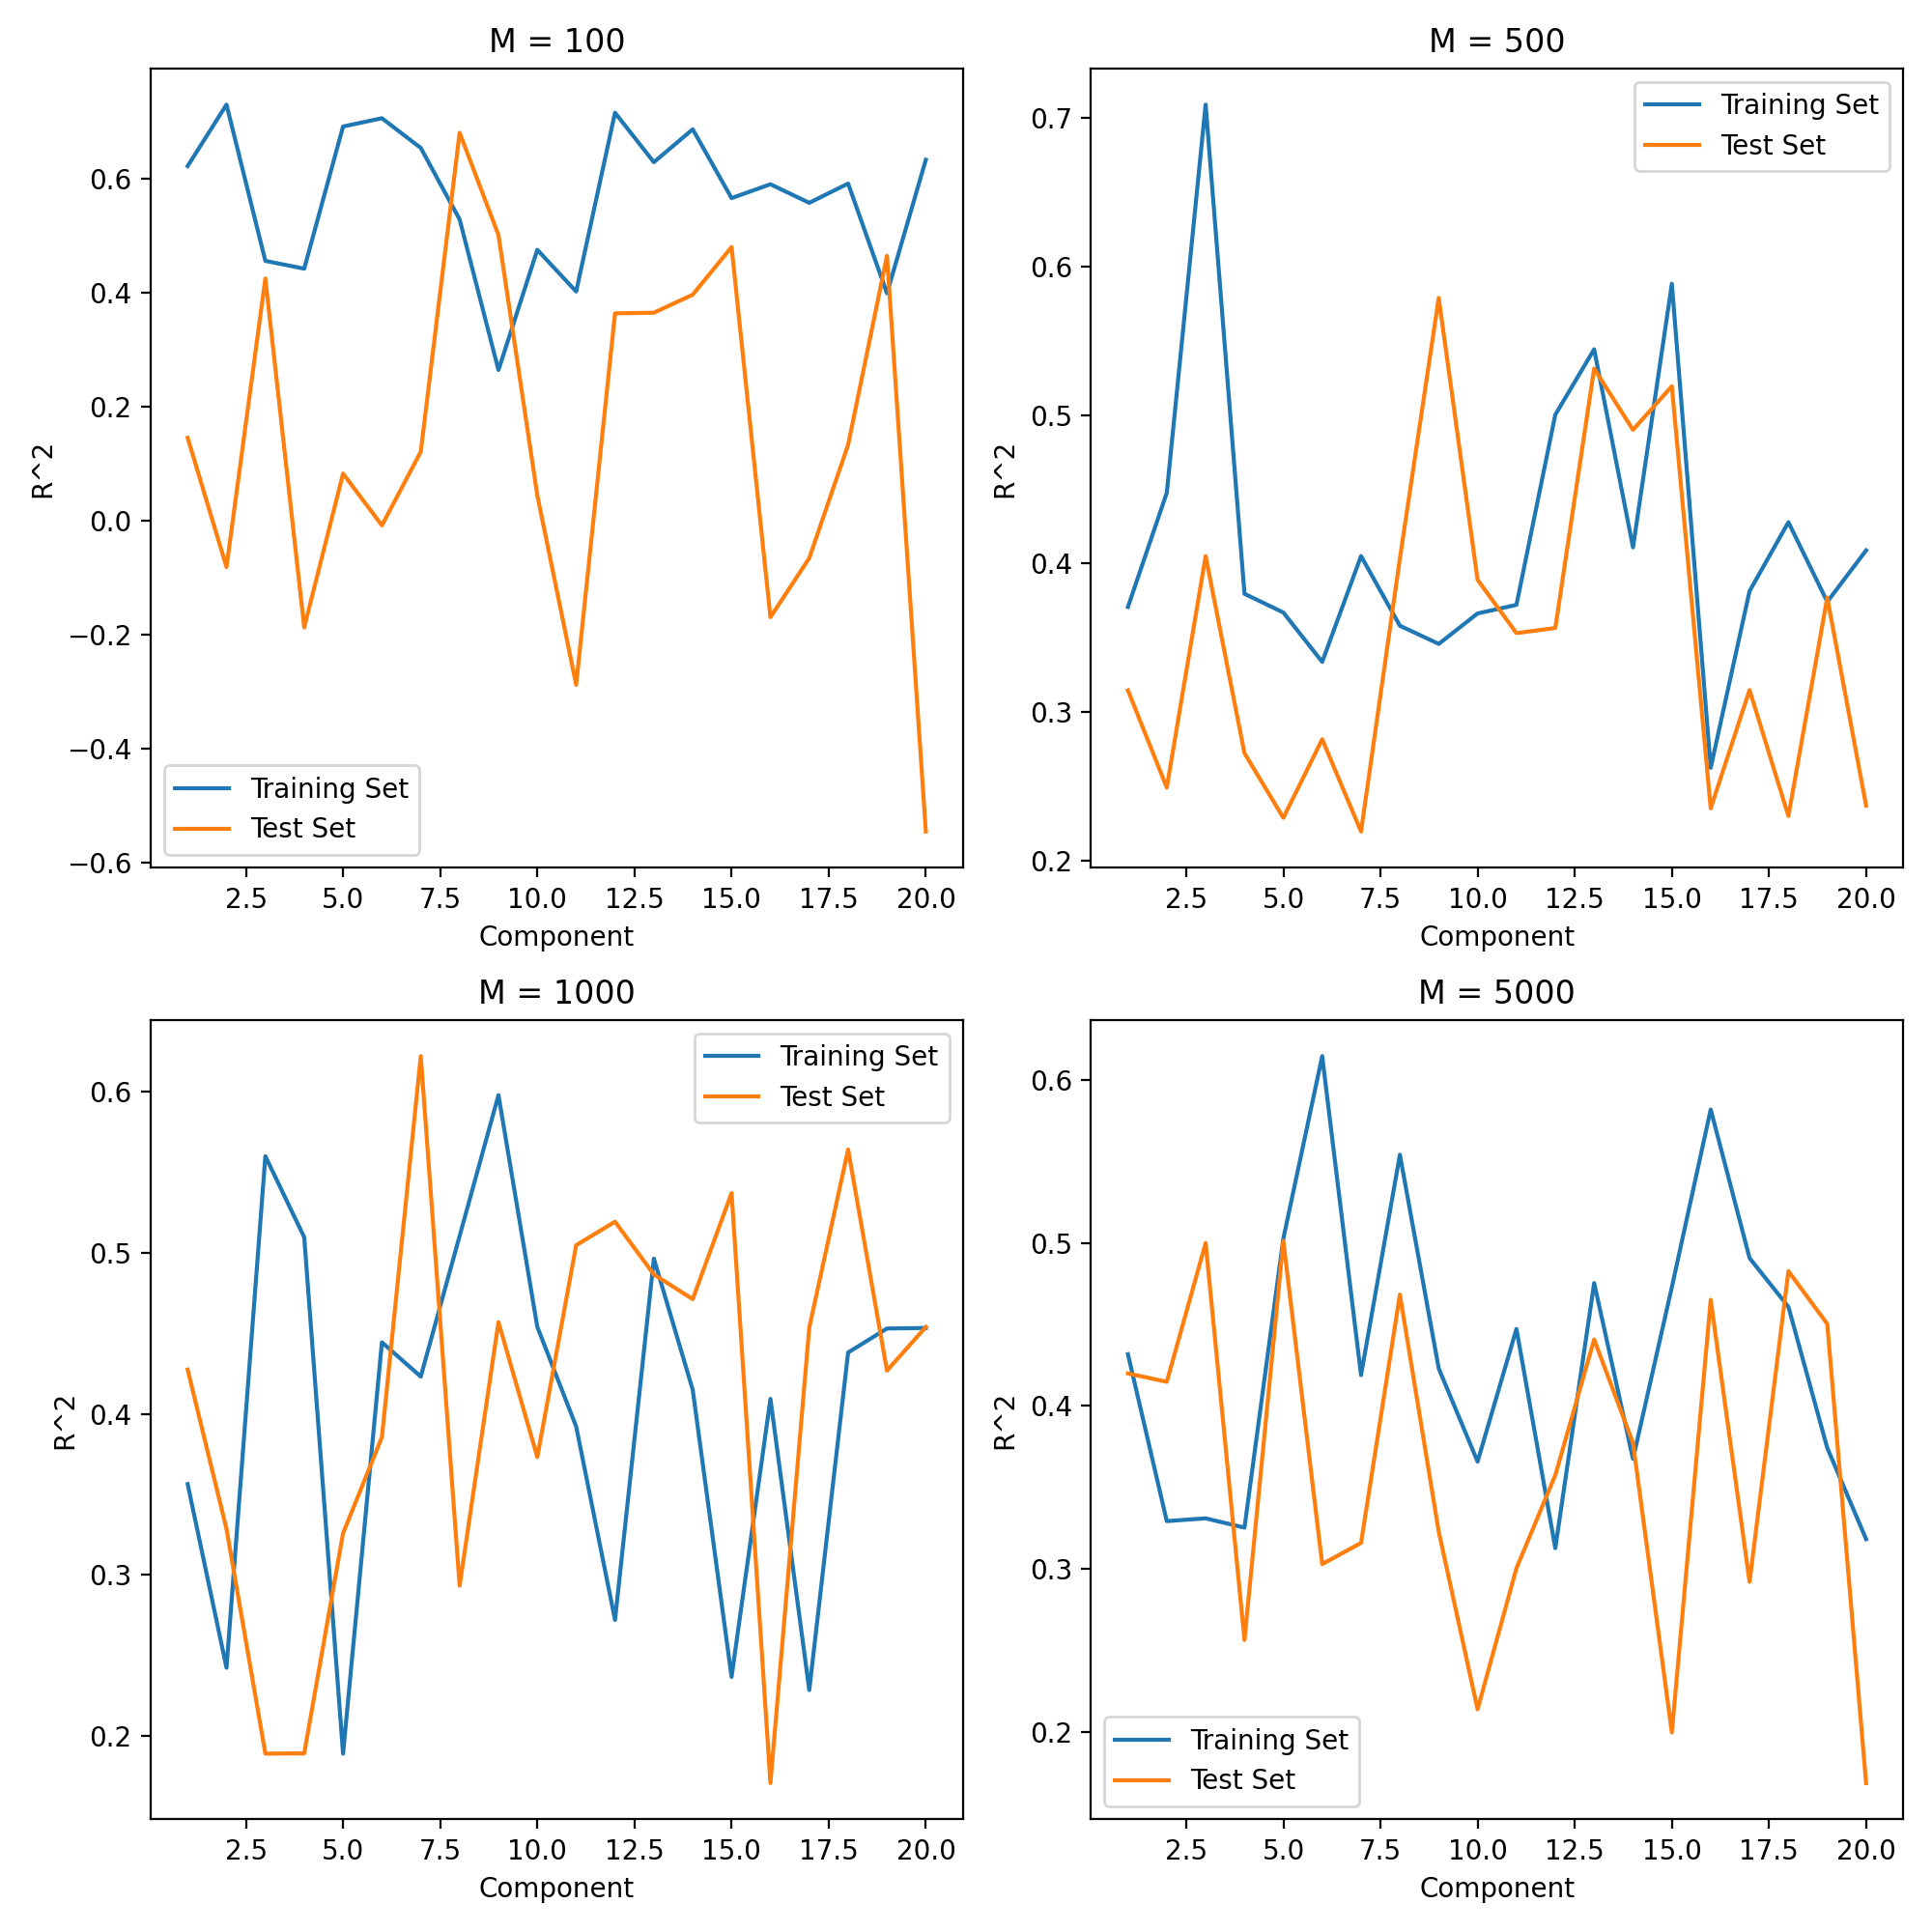

In [100]:
#SUBPLOTS OF CHANGING M

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10, 10))


# Nz = 50, M = 100, Nx = 20
ax1.plot(component_r2(50,100,20)[2],component_r2(50,100,20)[0],label = 'Training Set')
ax1.plot(component_r2(50,100,20)[2],component_r2(50,100,20)[1], label = 'Test Set')
ax1.set_xlabel('Component')
ax1.set_ylabel('R^2')
ax1.set_title('M = 100')
ax1.legend()


# Nz = 50, M = 500, Nx = 20
ax2.plot(component_r2(50,500,20)[2],component_r2(50,500,20)[0],label = 'Training Set')
ax2.plot(component_r2(50,500,20)[2],component_r2(50,500,20)[1], label = 'Test Set')
ax2.set_xlabel('Component')
ax2.set_ylabel('R^2')
ax2.set_title('M = 500')
ax2.legend()

# Nz = 50, M = 1000, Nx = 20
ax3.plot(component_r2(50,1000,20)[2],component_r2(50,1000,20)[0],label = 'Training Set')
ax3.plot(component_r2(50,1000,20)[2],component_r2(50,1000,20)[1], label = 'Test Set')
ax3.set_xlabel('Component')
ax3.set_ylabel('R^2')
ax3.set_title('M = 1000')
ax3.legend()

# Nz = 50, M = 5000, Nx = 20
ax4.plot(component_r2(50,5000,20)[2],component_r2(50,5000,20)[0],label = 'Training Set')
ax4.plot(component_r2(50,5000,20)[2],component_r2(50,5000,20)[1], label = 'Test Set')
ax4.set_xlabel('Component')
ax4.set_ylabel('R^2')
ax4.set_title('M = 5000')
ax4.legend()

fig.tight_layout()
plt.show()
plt.savefig('pca_r2_vals_M.png')

In [ ]:
#USING THE SAME X, Y



### ALL CASES

In [13]:
# NO PCA
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

y_pred_train = regr.predict(X_train)
y_pred_test  = regr.predict(X_test)

r2_train = (np.corrcoef(y_pred_train, y_train)[0,1])**2
r2_test  = (np.corrcoef(y_pred_test , y_test)[0,1])**2

print('Training R^2 is %.1f%%' % (r2_train*100))
print('Testing R^2 is %.1f%%'  % (r2_test*100))

Training R^2 is 45.1%
Testing R^2 is 48.6%


In [14]:
# PCA WITH ALL COMPONENTS- NO SCALING

pca = PCA(n_components = Nx)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

pca_model = linear_model.LinearRegression(fit_intercept=True)
pca_model.fit(X_train_pca, y_train)

y_pred_train = pca_model.predict(X_train_pca)
y_pred_test  = pca_model.predict(X_test_pca)

r2_train = (np.corrcoef(y_pred_train, y_train)[0,1])**2
r2_test  = (np.corrcoef(y_pred_test , y_test)[0,1])**2

print('Training R^2 is %.1f%%' % (r2_train*100))
print('Testing R^2 is %.1f%%'  % (r2_test*100))

Training R^2 is 45.1%
Testing R^2 is 48.6%


In [15]:
# PCA WITH HALF THE COMPONENTS- NO SCALING

pca = PCA(n_components = int(Nx/2))
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

pca_model = linear_model.LinearRegression(fit_intercept=True)
pca_model.fit(X_train_pca, y_train)

y_pred_train = pca_model.predict(X_train_pca)
y_pred_test  = pca_model.predict(X_test_pca)

r2_train = (np.corrcoef(y_pred_train, y_train)[0,1])**2
r2_test  = (np.corrcoef(y_pred_test , y_test)[0,1])**2

print('Training R^2 is %.1f%%' % (r2_train*100))
print('Testing R^2 is %.1f%%'  % (r2_test*100))


Training R^2 is 15.1%
Testing R^2 is 15.1%


In [16]:
#PCA WITH ALL COMPONENTS- SCALING

#Should standardize to unit var/std dev and Center at mean  
sc = StandardScaler()
sc.fit(X_train)
sc.fit(X_test)

X_reduced_train = sc.transform(X_train)
X_reduced_test = sc.transform(X_test)

pca = PCA(n_components = Nx)
pca.fit(X_reduced_train)

X_train_pca = pca.transform(X_reduced_train)
X_test_pca = pca.transform(X_reduced_test)

model = linear_model.LinearRegression(fit_intercept=True)
model.fit(X_train_pca, y_train)

y_pred_train = model.predict(X_train_pca)
y_pred_test  = model.predict(X_test_pca)

r2_train = (np.corrcoef(y_pred_train, y_train)[0,1])**2
r2_test  = (np.corrcoef(y_pred_test , y_test)[0,1])**2

print('Training R^2 is %.1f%%' % (r2_train*100))
print('Testing R^2 is %.1f%%'  % (r2_test*100))

Training R^2 is 45.1%
Testing R^2 is 48.6%


In [22]:
#PCA WITH HALF THE COMPONENTS - SCALING

#Should standardize to unit var/std dev and Center at mean  
sc = StandardScaler()
sc.fit(X_train)
sc.fit(X_test)

X_reduced_train = sc.transform(X_train)
X_reduced_test = sc.transform(X_test)

pca = PCA(n_components = int(Nx/2))
pca.fit(X_reduced_train)

X_train_pca = pca.transform(X_reduced_train)
X_test_pca = pca.transform(X_reduced_test)

model = linear_model.LinearRegression(fit_intercept=True)
model.fit(X_train_pca, y_train)

y_pred_train = model.predict(X_train_pca)
y_pred_test  = model.predict(X_test_pca)

r2_train = (np.corrcoef(y_pred_train, y_train)[0,1])**2
r2_test  = (np.corrcoef(y_pred_test , y_test)[0,1])**2

print('Training R^2 is %.1f%%' % (r2_train*100))
print('Testing R^2 is %.1f%%'  % (r2_test*100))

Training R^2 is 19.3%
Testing R^2 is 16.1%


<IPython.core.display.Javascript object>


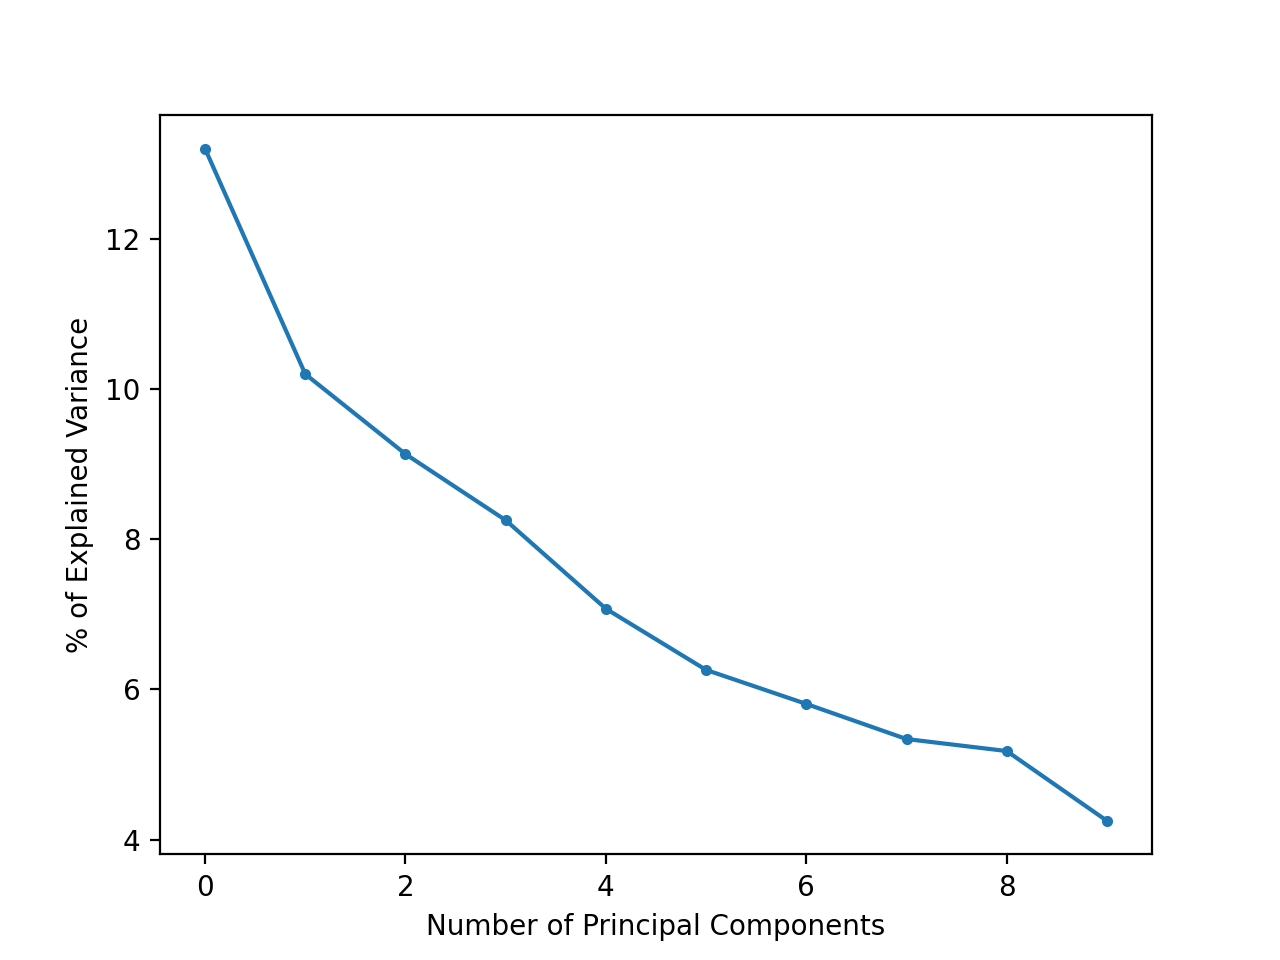

In [18]:
#PCA and Var
plt.figure()
plt.plot(pca.explained_variance_ratio_ *100,'.-')
plt.xlabel('Number of Principal Components')
plt.ylabel('% of Explained Variance')
plt.show()

In [19]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
var

array([13.2 , 23.4 , 32.54, 40.79, 47.86, 54.12, 59.93, 65.27, 70.45,
       74.7 ])